# <a id='link2'>Background & Context:</a>
The Policy Maker of the tourism company wants to enable and establish a viable business model to expand the customer base.
A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

# <a id='link2'>Objective:</a>     
1. Analyze the customers' data and provide recommendations.
2. Build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# <a id='link2'>Data Dictionary:</a>
Customer details:
* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 
* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer


# <a id='link2'>Loading Libraries</a>

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# <a id='link2'>Loading and exploring the data</a>

In [2]:
data = pd.read_excel("Tourism.xlsx")
df = data.copy() # Making a copy of the data
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

# Setting the random seed to look at 10 random rows
np.random.seed(1)
df.sample(n=10)

There are 4888 rows and 20 columns.


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


* The dataset has 4888 rows and 20 columns.

In [3]:
df.info() # Checking the dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
## Converting the data type of categorical features to 'category'
cat_cols = ['ProdTaken', 'CityTier', 'TypeofContact','Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 
            'Passport', 'OwnCar', 'Designation', 'PreferredPropertyStar']
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

### Statistical summary for the dataset.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


In [6]:
data.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032


## Insights:

- We can drop 'CustomerID' column as it is an ID variable and will not add value to the model, We can neglect this information for our model prediction.
- Average income of customers is approximately 24k dollars. Income has a wide range from 1k dollars to 98k dollars, there is a huge difference in 75th percentile and maximum value which indicates there might be outliers present in the data.
- The *Gender* column has 3 unique values, we will see if some insights can be extracted from it.
- The average age of customers is 37 years, age of customers has a wide range from 18 to 61 years..
- MaritalStatus column has 4 unique values, and most of the customers are married.
- Most of the customers own a car, but more than half of the customers don't have a passport.
- Most of the customers occupation is based on salary.
- There's a huge difference in the 75th percentile and maximum value of the customers duration of pitch indicating that there might be outliers present.
- ProdTaken: Most of the customers did not purchase a package.
- TypeofContact: Most of the customers made enquiries by themselves.

In [7]:
df.drop(['CustomerID'],axis=1,inplace=True) # Dropping the CustomerID column

In [8]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('-'*35)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
-----------------------------------
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
-----------------------------------
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
-----------------------------------
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
-----------------------------------
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
-----------------------------------
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
-----------------------------------
Unique values in MaritalStatus are :
Married      2

In [9]:
df['Gender'] = df['Gender'].replace(['Fe Male'], 'Female') # Replacing 'Fe Male' with 'Female'

### Checking for missing values

In [10]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

* Some of the variables in the dataset have missing datas, which will be treated after the exploratory data analysis.

# <a id='link2'>Exploratory Data Analysis</a>

## Univariate analysis

In [11]:
# Writing a function to help create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(12,7), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, figsize = figsize, 
                                           gridspec_kw = {"height_ratios": (.25, .75)})
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

**Exploring the *Age* variable**

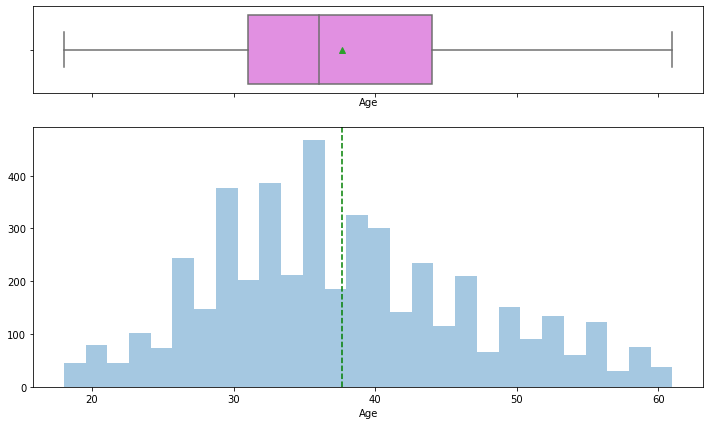

In [12]:
histogram_boxplot(df["Age"])

* Age is somewhat normally distributed and has no outliers.
* The mean and median are relatively close

**Exploring the *DurationOfPitch* variable**

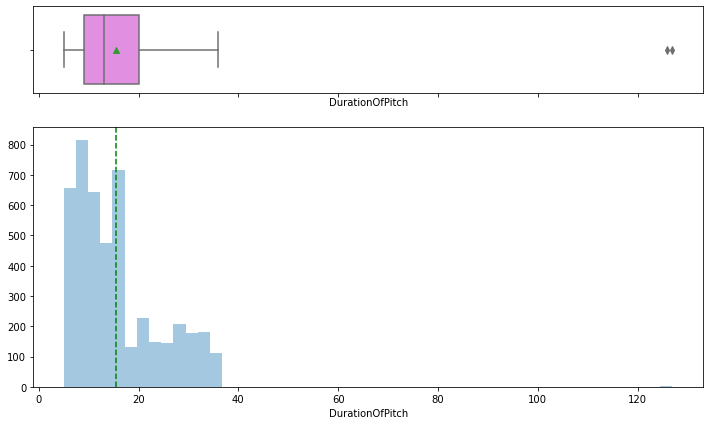

In [13]:
histogram_boxplot(df["DurationOfPitch"])

* The distribution is right skewed.
* It has outliers towards the higher end.

**Exploring the *MonthlyIncome* variable**

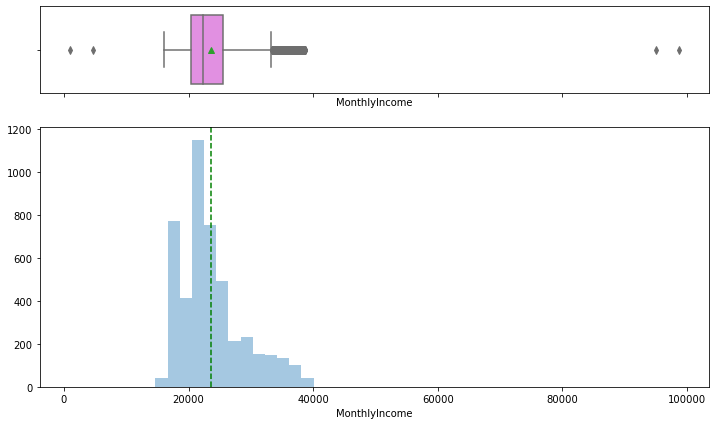

In [14]:
histogram_boxplot(df["MonthlyIncome"])

* Monthly income has outliers on both sides
* The mean and median are somewhat close and some of the customers earn as high as 98k

**Exploring the *NumberOfTrips* variable**

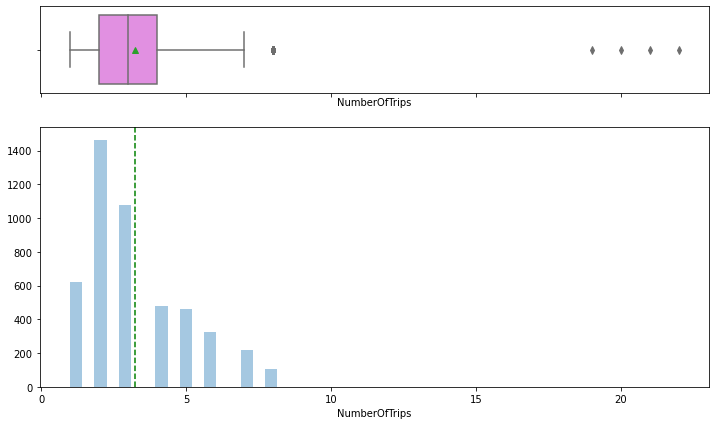

In [15]:
histogram_boxplot(df["NumberOfTrips"])

* NumberOfTrips is right skewed and has outliers towards the high end.

**Exploring the distribution of all other numerical variable**

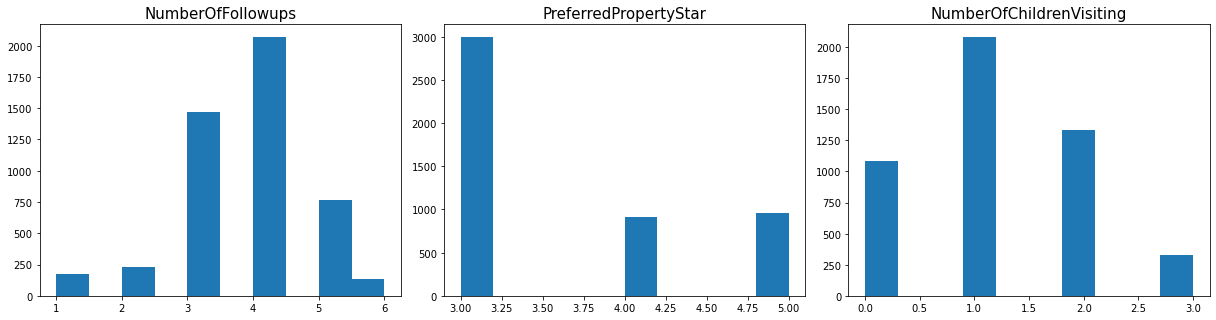

In [16]:
num_col = df.select_dtypes('float64', 'int64').columns.tolist()
num_col.remove("Age")
num_col.remove("DurationOfPitch")
num_col.remove("MonthlyIncome")
num_col.remove("NumberOfTrips")

plt.figure(figsize=(17, 75))

for i in range(len(num_col)):
    plt.subplot(18, 3, i + 1)
    plt.hist(df[num_col[i]])
    plt.tight_layout()
    plt.title(num_col[i], fontsize=15)

* Most customers prefer 3 star properties and customers visiting with one child is higher compared to the others.
* Most customers were followed up 4 times and some had a 6 times follow up.

In [17]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(feature):
    
    total = len(df[feature]) # length of the column
    plt.figure(figsize=(10,5))
    ax = sns.countplot(df[feature],palette='pastel')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

### ProdTaken

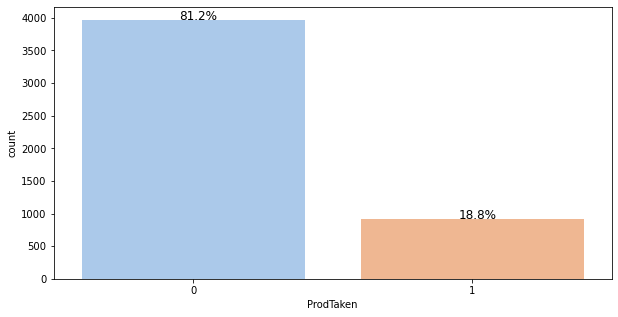

In [18]:
perc_on_bar('ProdTaken')

* More than half of the customers did not purchase a package.

### Gender

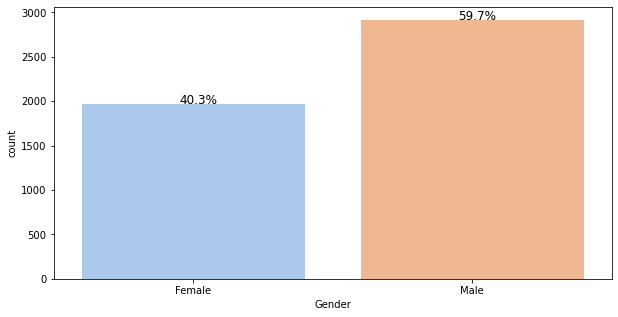

In [19]:
perc_on_bar('Gender')

* There are more male customers compared to the female customers with a difference of almost 20%

### MaritalStatus

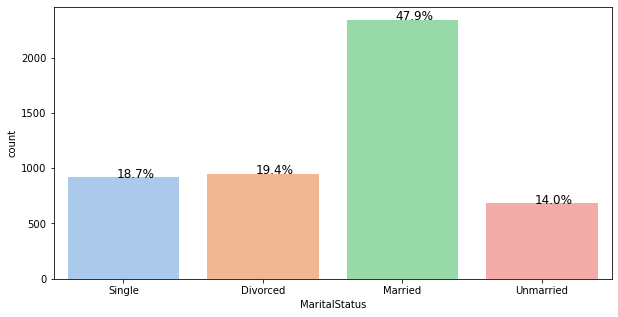

In [20]:
perc_on_bar('MaritalStatus')

* Approximately 48% of the customers are married, percentage of single and divorced customers are relatively close.

### CityTier

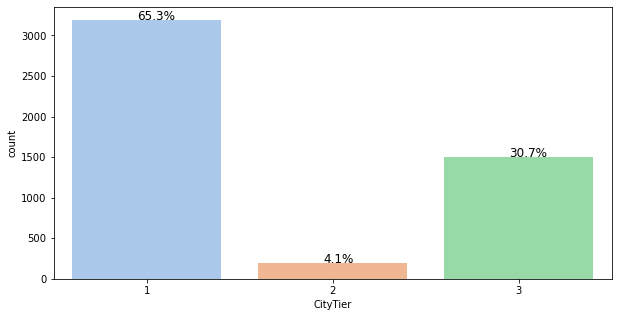

In [21]:
perc_on_bar('CityTier')

* There are more customers in Tier 1 totaling to 65% compared to the other Tier's

### Occupation

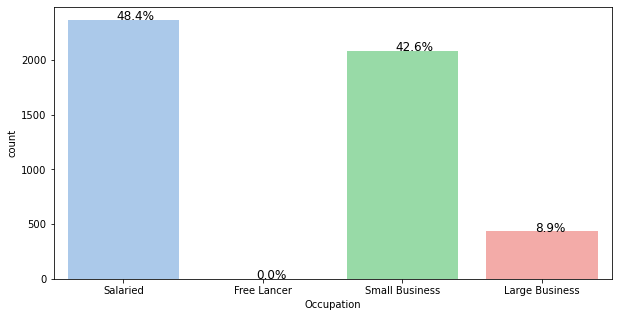

In [22]:
perc_on_bar('Occupation')

* Most of the customers are either small business owners or salary earners while, very few customers  are free lancers.

### Designation

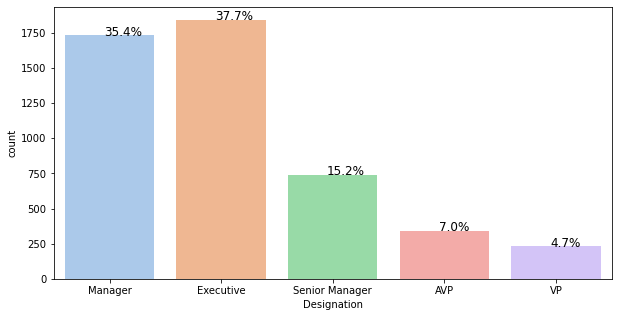

In [23]:
perc_on_bar('Designation')

* Few of the customers are in high ranking designations while more than 70% of the customers are in managerial and executive designations.

### ProductPitched

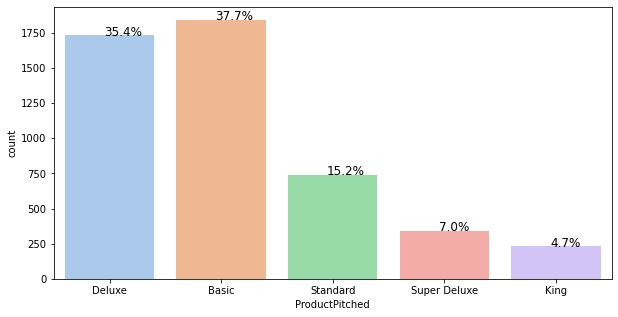

In [24]:
perc_on_bar('ProductPitched')

* Basic and Deluxe are the two most product pitched by the sales person to the customers.

### PitchSatisfactionScore

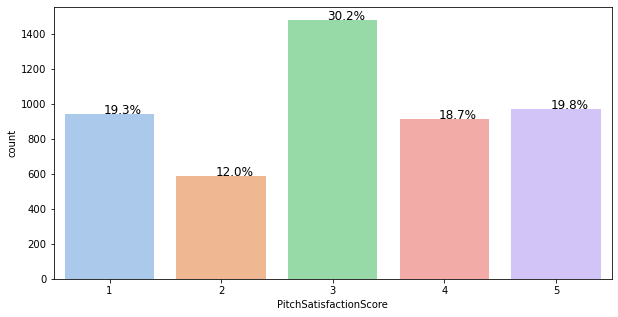

In [25]:
perc_on_bar('PitchSatisfactionScore')

* Most of the pitch satisfaction seem to be averagely scored with a score of 30.2%, about 39% of the scores are greater than 3.

### PreferredPropertyStar

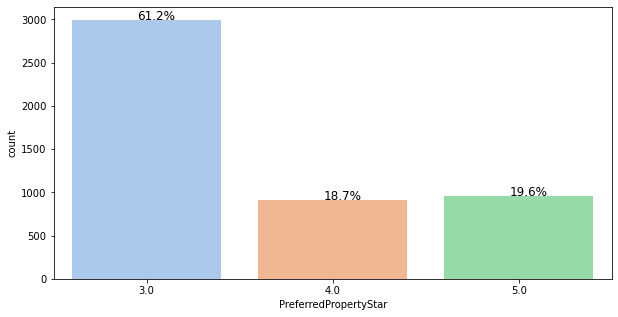

In [26]:
perc_on_bar('PreferredPropertyStar')

* Most of the customers prefer property with 3 star rating

### TypeofContact, OwnCar, Passport

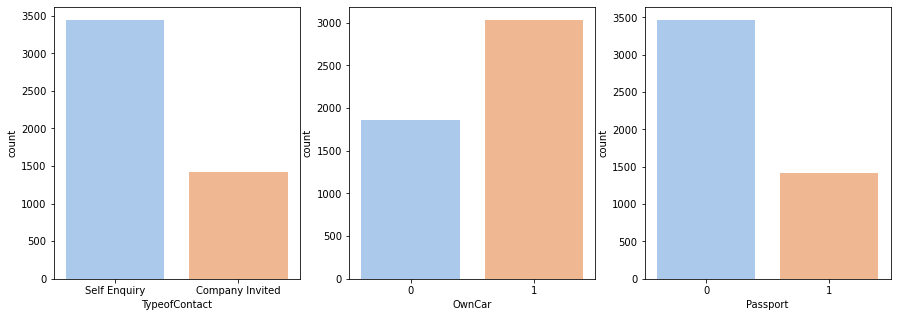

In [27]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.countplot(df['TypeofContact'], ax=ax[0], palette='pastel')
sns.countplot(df['OwnCar'], ax=ax[1], palette='pastel')
sns.countplot(df['Passport'], ax=ax[2], palette='pastel')
fig.show()

* Most of the customers made enquiry by themselves and less than half were invited directly by the company.
* Proportion of customers that own a car is higher than the proportion of customers that don't own a car.
* Most of the customers don't have a passport.

## Bivariate analysis

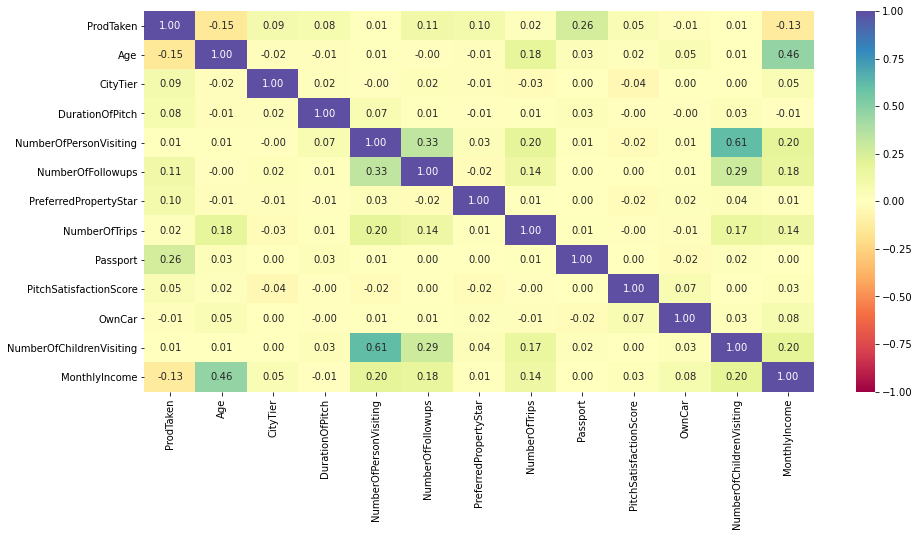

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* None of the variables are highly correlated with each other.
* NumberofPersonVisiting is mid-correlated with  NumberofChildrenVisiting.

In [29]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*80)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### ProdTaken vs TypeofContact

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
--------------------------------------------------------------------------------


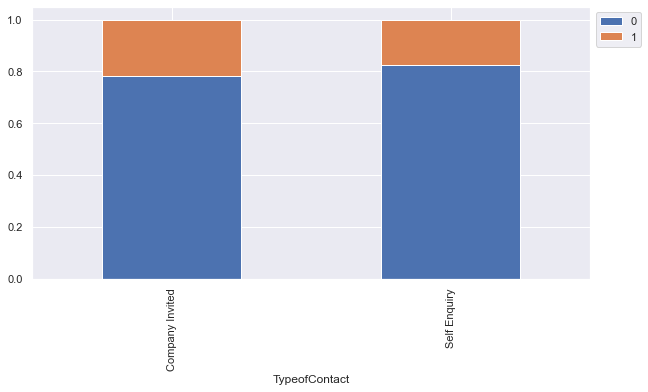

In [30]:
stacked_plot(df['TypeofContact'])

* About 18% of customers that made a self enquiry purchased a package, while approximately 22% of customers that got invited by the company purchased a package.

### ProdTaken vs CityTier

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
--------------------------------------------------------------------------------


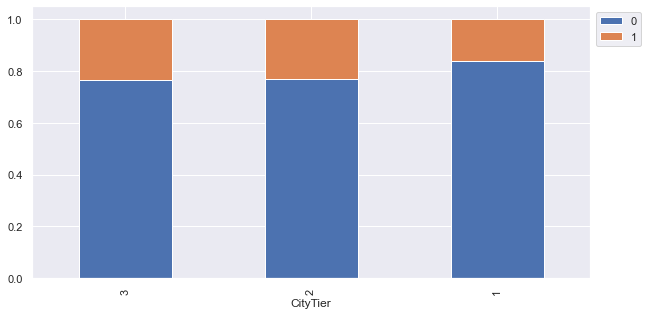

In [31]:
stacked_plot(df['CityTier'])

* The higher the city tier, the more likely the customer will purchase a package.
* Even though Tier 1 has more population, customers who live in Tier 2 and 3 have a higher a percentage of purchase compared to Tier 1

### ProdTaken vs Occupation

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
--------------------------------------------------------------------------------


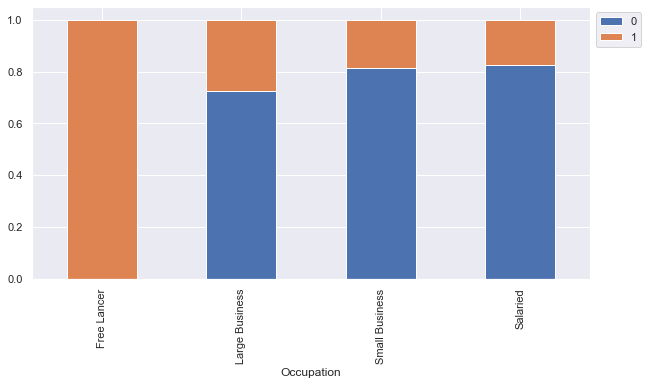

In [32]:
stacked_plot(df['Occupation'])

* All free lancer customers purchased a package.
* Purchase percentage of customers who are salaried or own small business  are relatively equal.
* More than quarter of the customers who own large business purchased a package.

### ProdTaken vs Gender

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
--------------------------------------------------------------------------------


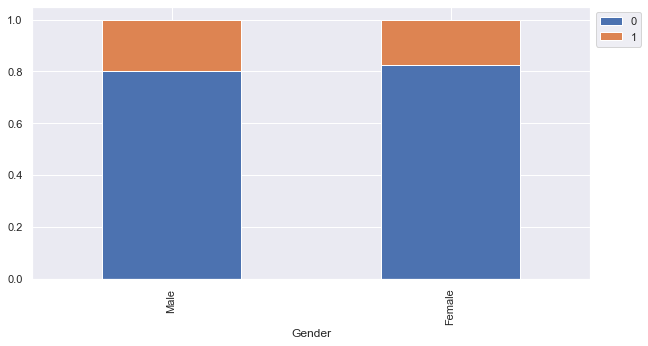

In [33]:
stacked_plot(df['Gender'])

* Purchase percentage of male and female customers are relatively equal.

### ProdTaken vs ProductPitched

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
--------------------------------------------------------------------------------


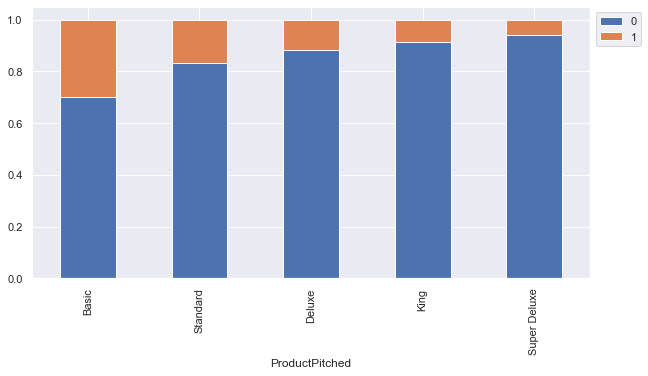

In [34]:
stacked_plot(df['ProductPitched'])

* Less than 12% of customers that were pitched KIng, Super Deluxe and Deluxe product purchased a package.
* More than 15% of customers that were pitched Basic and Standard product purchased a package.

### ProdTaken vs PitchSatisfactionScore

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
--------------------------------------------------------------------------------


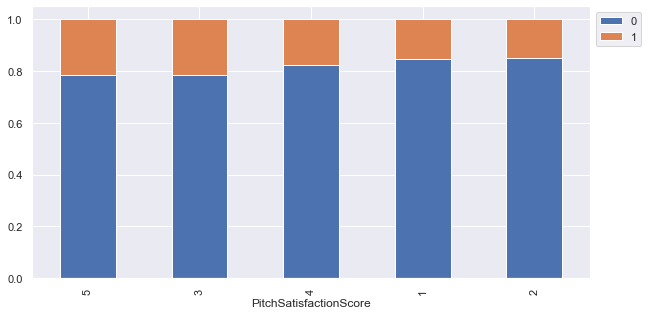

In [35]:
stacked_plot(df['PitchSatisfactionScore'])

* More than 20% of customers who rated a pitch satisfaction of 3 and 5 purchased a package.

### ProdTaken vs MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
--------------------------------------------------------------------------------


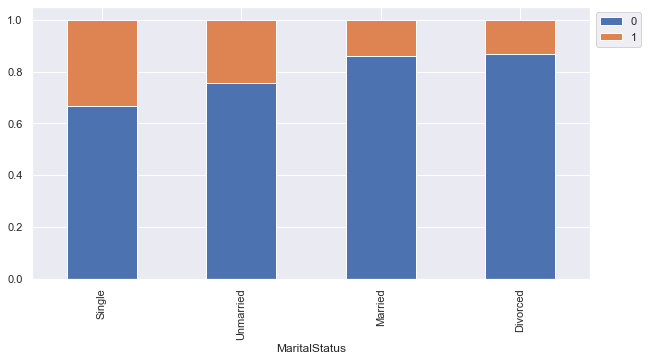

In [36]:
stacked_plot(df['MaritalStatus'])

* Single and unmarried customers are more likely to purchase a package.
* Purchase percentage of married and unmarried customers are relatively equal.

### ProdTaken vs Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
--------------------------------------------------------------------------------


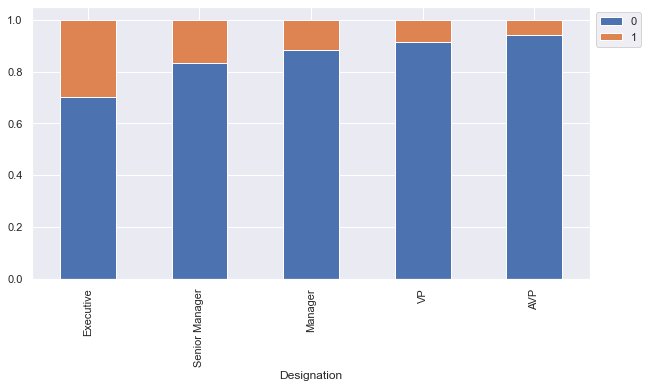

In [37]:
stacked_plot(df['Designation'])

* Customers with executive designation are more likely to purchase a package, while Customers with VP and AVP designation are the least likely to purchase a package.

In [38]:
# Function to plot Boxplots of customers
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(1,2,figsize=(12,6))
    axs[0].set_title(f'Boxplot of {x} w.r.t ProdTaken',fontsize=12,fontweight='bold')
    sns.boxplot(df[target],df[x],ax=axs[0],palette='pastel',showmeans=True)
    axs[1].set_title(f'Boxplot of {x} w.r.t ProdTaken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(df[target],df[x],ax=axs[1],showfliers=False,palette='pastel',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

### ProdTaken vs Age

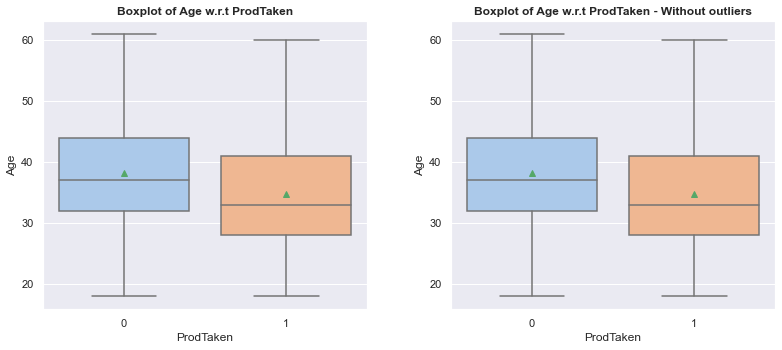

In [39]:
plot('Age')

* The customers who are more likely to purchase a package have a smaller range than the ones who might not purchase a package.

### ProdTaken vs DurationOfPitch

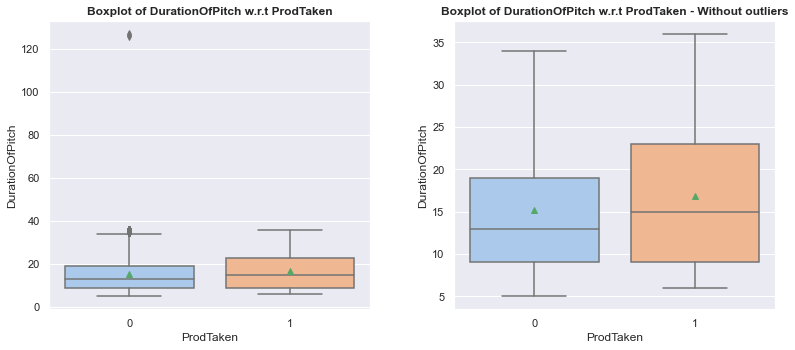

In [40]:
plot('DurationOfPitch')

* Customers with a high duration of pitch of more than 20 by a salesperson are more likely to purchase a package. 

### ProdTaken vs MonthlyIncome

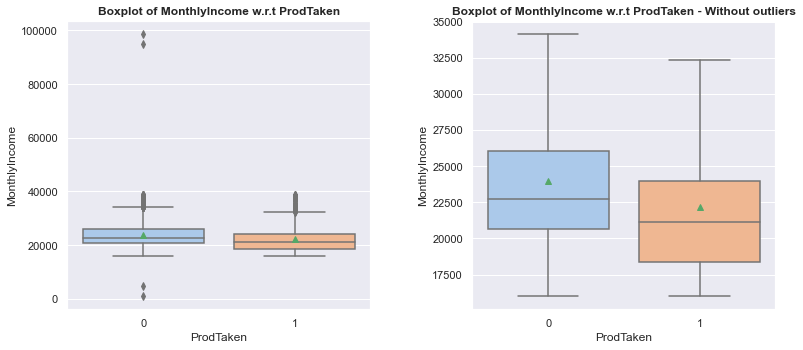

In [41]:
plot('MonthlyIncome')

* Those customers who have a monthly income higher than 25k dollars are more likely not to purchase a package.
* Monthly income doesn't seem to provide a good separation between the two classes.

### ProdTaken vs NumberOfTrips

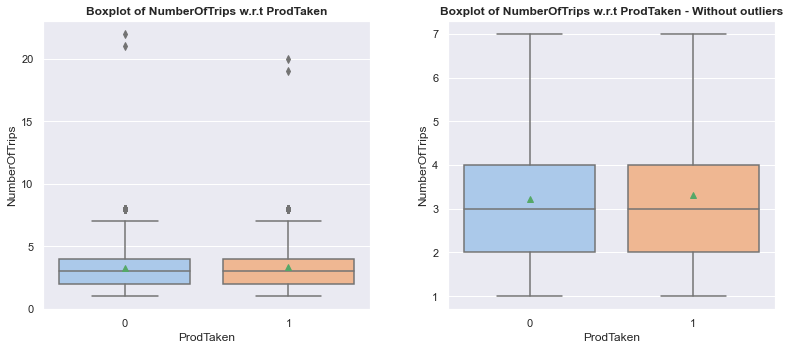

In [42]:
plot('NumberOfTrips')

* There's no difference in the number of trips taken by a customers who purchased a package and those who did not.

### ProdTaken vs NumberOfFollowups

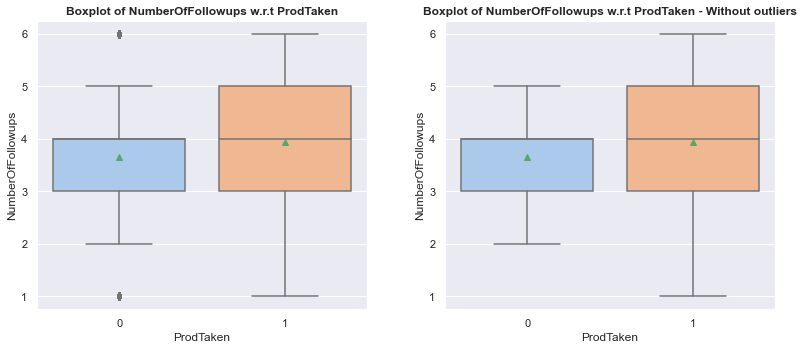

In [43]:
plot('NumberOfFollowups')

* Customers with higher follow-ups of more than 4 by a sales person after a sales pitch are more likely to purchase a package.

### ProdTaken vs NumberOfPersonVisiting, OwnCar, Passport

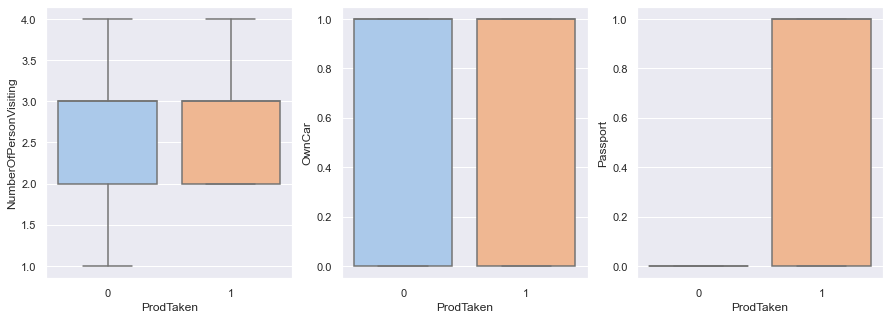

In [44]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.boxplot(df['ProdTaken'], df['NumberOfPersonVisiting'], ax=ax[0], palette='pastel', showfliers=False)
sns.boxplot(df['ProdTaken'], df['OwnCar'], ax=ax[1], palette='pastel', showfliers=False)
sns.boxplot(df['ProdTaken'], df['Passport'], ax=ax[2], palette='pastel', showfliers=False)
fig.show()

* All customers that have a passport purchased a package.
* There's no difference in the number of customers who own a car that purchased a package and those who did not, same goes for the number of person visiting.

### Let's fix the missing values

In [45]:
df[df["TypeofContact"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
571,0,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN
572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
576,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,NaN
579,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN
598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,NaN
622,0,32.0,NaN,3,NaN,Salaried,Male,3,3.0,Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,NaN
724,0,24.0,NaN,1,NaN,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,NaN
843,0,26.0,NaN,1,NaN,Small Business,Male,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,NaN
1021,1,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN


In [46]:
# All values missing in TypeofContact is also missing in DurationOfPitch and MonthlyIncome column.
# So we will drop the rows with the missing values in column TypeofContact.

df.dropna(subset=['TypeofContact'], inplace=True)
df.shape

(4863, 19)

In [47]:
# We will impute the remaining missing values in every numeric column using KNNImputer
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
imputer = KNNImputer(n_neighbors=2)
df[numeric_columns]=imputer.fit_transform(df[numeric_columns])

In [48]:
df.isnull().sum().sort_values(ascending=False)

MonthlyIncome               0
NumberOfFollowups           0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
ProductPitched              0
Designation                 0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
ProdTaken                   0
dtype: int64

### Removing any duplicate row

In [49]:
df.drop_duplicates(inplace=True)
df.shape # The number of rows reduced from 4863 to 4722, so there were 141 duplicate rows in the dataset.

(4722, 19)

### Percentage of outliers, in each column of the data, using IQR.

In [50]:
Q1 = data.quantile(0.25) #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1            #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR         #Finding lower and upper bounds for all values. All values outside these bounds are outliers.
upper=Q3+1.5*IQR

In [51]:
((df.select_dtypes(include=['float64','int64'])<lower) | 
 (df.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Age                         0.000000
CityTier                    0.000000
CustomerID                  0.000000
DurationOfPitch             0.040917
MonthlyIncome               6.914894
NumberOfChildrenVisiting    0.000000
NumberOfFollowups           6.260229
NumberOfPersonVisiting      0.061375
NumberOfTrips               2.168576
OwnCar                      0.000000
Passport                    0.000000
PitchSatisfactionScore      0.000000
PreferredPropertyStar       0.000000
ProdTaken                   0.000000
dtype: float64

* After identifying outliers, here we are not going to treat them as there will be outliers in a real case scenario (in MonthlyIncome, NumberOfFollowups, DurationOfPitch, NumberOfTrips) and we would want our model to learn the underlying pattern for such customers.

# <a id='link3'>Data Preparation for Modeling</a>

In [52]:
# defining X and y variables
X = df.drop("ProdTaken", axis=1)
y = df[["ProdTaken"]]

print(X.shape)
print(y.shape)

(4722, 18)
(4722, 1)


In [53]:
# creating dummy variables
X = pd.get_dummies(X, columns=["TypeofContact", "Occupation", "Gender", "ProductPitched", 
                               "MaritalStatus", "Designation"], drop_first=True)
X.head(2)

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3.0,6.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,0.0,20993.0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
1,49.0,1.0,14.0,3.0,4.0,4.0,2.0,0.0,3.0,1.0,2.0,20130.0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0


### Split the data into train and test sets in 70:30 ratio

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in train data =", X_test.shape[0])

Number of rows in train data = 3305
Number of rows in train data = 1417


In [55]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [56]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Right metric for model performance evaluation:

- **True Positives:**
    - Reality: Customer will purchase the newly introduced travel package.
    - Model predicted: The customer will purchase the newly introduced travel package.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: Customer will not purchase the newly introduced travel package.
    - Model predicted: The customer will not purchase the newly introduced travel package.
    - Outcome: The company is unaffected.

- **False Positives:**
    - Reality: Customer will not purchase the newly introduced travel package.
    - Model predicted: The customer will purchase the newly introduced travel package.
    - Outcome: The company which is targeting potential customers will be wasting their resources on customers who will not purchase the newly introduced travel package.

- **False Negatives:**
    - Reality: Customer will purchase the newly introduced travel package.
    - Model predicted: The customer will not purchase the newly introduced travel package.
    - Outcome: The potential customer is missed.
    
In this case, the company wants to avoid failing to identify potential customers. Hence, RECALL is the right metric to check the performance of the model.

## Bagging Models

### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.994251  0.971338   0.998363  0.984665
   Accuracy    Recall  Precision        F1
0   0.90614  0.623574   0.828283  0.711497


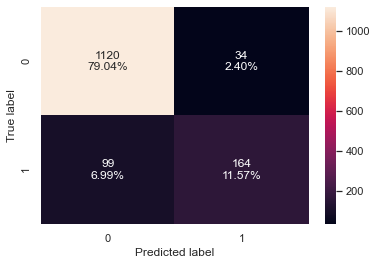

In [57]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is giving very good Accuracy and Precision but its not able to generalize well on test data in terms of Recall and F1.
* The model is not overfitting the training data.

### Tuning Bagging Classifier

In [58]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0   0.99879  0.993631        1.0  0.996805
   Accuracy   Recall  Precision        F1
0  0.911785  0.60076    0.88764  0.716553


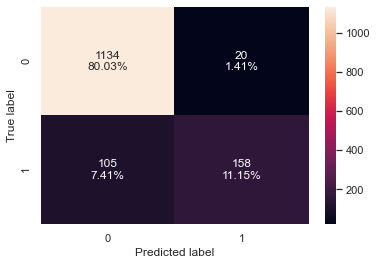

In [59]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* The tuned bagging classifier is overfitting the training set in terms of Precision. 
* Surprisingly, the test recall has decreased after hyperparameter tuning.

### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.909668  0.555133   0.929936  0.695238


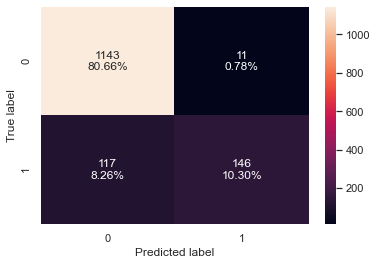

In [60]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

* Random forest is overfitting on the training set and is performing poorly on the test set in terms of recall.
* Let's try hyperparameter tuning and see if the model performance improves.

### Tuning Random Forest

In [61]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=None, n_estimators=70,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0    0.9259  0.69962    0.87619  0.778013


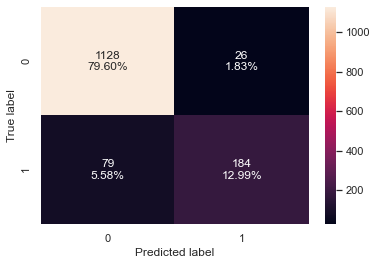

In [62]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* Tuned random forest is still overfitting on the training set but its performing better on the test set in terms of recall and F1

### Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.877911  0.688213   0.665441  0.676636


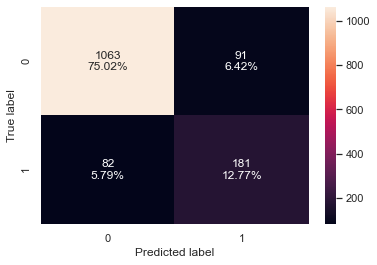

In [63]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Tuning Decision Tree

In [64]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.877911  0.688213   0.665441  0.676636


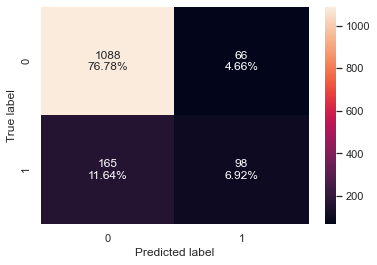

In [65]:
#Calculating different metrics
dtree_tuned_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_tuned_model_train_perf)
dtree_tuned_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_tuned,X_test,y_test)

* The model is still overfitting the training data.
* The confusion matrix shows that the model is not good at predicting which customer is more likely to purchase the newly introduced travel package.

## Boosting Models

### AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.844781  0.340764   0.683706  0.454835
   Accuracy    Recall  Precision        F1
0  0.852505  0.372624   0.690141  0.483951


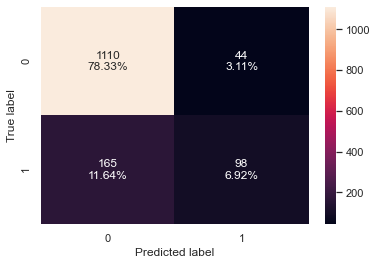

In [66]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* AdaBoost is generalizing well and its not overfitting the training data. 
* It is giving poor performance, in terms of recall, precision and f1 score but giving a good accuracy score.

### Tuning AdaBoost

In [68]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.4000000000000001, n_estimators=100,
                   random_state=1)

   Accuracy    Recall  Precision        F1
0  0.994251  0.982484     0.9872  0.984836
   Accuracy    Recall  Precision        F1
0  0.880734  0.608365   0.707965  0.654397


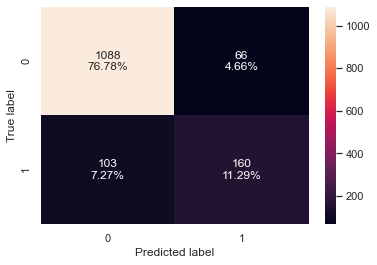

In [69]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* There is a significant improvement after tuning AdaBoost but the model has started to overfit the training data.

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0   0.88351  0.461783   0.860534  0.601036
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.869442  0.410646   0.782609  0.538653


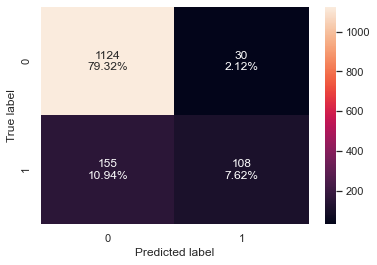

In [70]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* Gradient boosting classifier is generalizing well and its not overfitting the training data but its giving poor performance, in terms of recall and f1 score but giving a good accuracy and precision score.

### Tuning Gradient Booster

In [71]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.930106  0.667197   0.950113  0.78391
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.885674  0.528517   0.785311  0.631818


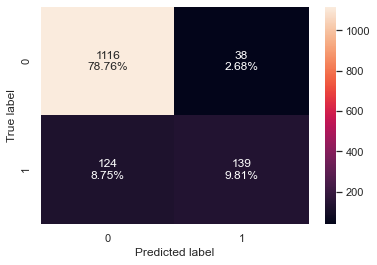

In [72]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* Ther is some improvement after tuning but it is still giving a poor performance in terms of recall.

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999697  0.998408        1.0  0.999203
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.923077  0.680608   0.877451  0.766595


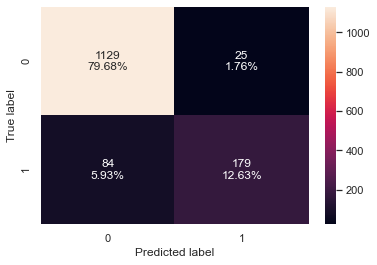

In [73]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* xgboost classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Tuning XGBoost

In [74]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.904085  0.923567   0.683157  0.785376
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.853211  0.768061   0.578797  0.660131


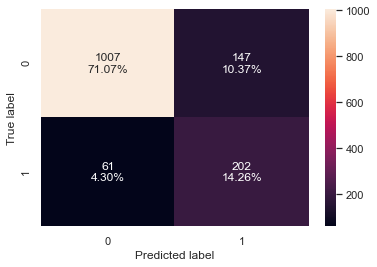

In [75]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The overfitting has reduced and it seems to be generalizing well with a better recall score in the test data, compared to the other models.
* The confusion matrix shows that the model is very good at predicting which customer is more likely to purchase the newly introduced travel package.

### Stacking Classifier

In [76]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_tuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=20,
                                                       max_features=None,
                                                       n_estimators=70,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree',
                                DecisionTreeClassifier(max_depth=2,
                                                       max_leaf_node...
                

Training performance:
    Accuracy  Recall  Precision        F1
0  0.992133     1.0   0.960245  0.979719
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.890614  0.882129   0.651685  0.749596


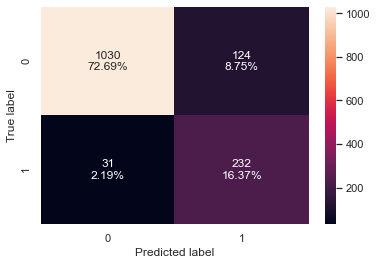

In [77]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* The stacking classifier gives the highest recall score compared to the other models but its overfitting the training data.
* The confusion matrix shows that the model is very good at predicting which customer is more likely to purchase the newly introduced travel package, which is more better than the confusion matrix for the tuned XGBoost classifier.

### Comparing all models

In [78]:
# training performance comparison

models_train_comp_df = pd.concat(
    [bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,
     rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,d_tree_model_train_perf.T,
     dtree_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,abc_tuned_model_train_perf.T,
     gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
     xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Decision Tree",
    "Decision Tree Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging Classifier,Bagging Estimator Tuned,Random Forest Estimator,Random Forest Tuned,Decision Tree,Decision Tree Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.994251,0.998790,1.0,1.0,1.0,1.0,0.844781,0.994251,0.883510,0.930106,0.999697,0.904085,0.992133
Recall,0.971338,0.993631,1.0,1.0,1.0,1.0,0.340764,0.982484,0.461783,0.667197,0.998408,0.923567,1.000000
Precision,0.998363,1.000000,1.0,1.0,1.0,1.0,0.683706,0.987200,0.860534,0.950113,1.000000,0.683157,0.960245
F1,0.984665,0.996805,1.0,1.0,1.0,1.0,0.454835,0.984836,0.601036,0.783910,0.999203,0.785376,0.979719


In [80]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,
     rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,d_tree_model_test_perf.T,
     dtree_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,abc_tuned_model_test_perf.T,
     gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
     xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Decision Tree",
    "Decision Tree Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Bagging Classifier,Bagging Estimator Tuned,Random Forest Estimator,Random Forest Tuned,Decision Tree,Decision Tree Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.906140,0.911785,0.909668,0.925900,0.877911,0.877911,0.852505,0.880734,0.869442,0.885674,0.923077,0.853211,0.890614
Recall,0.623574,0.600760,0.555133,0.699620,0.688213,0.688213,0.372624,0.608365,0.410646,0.528517,0.680608,0.768061,0.882129
Precision,0.828283,0.887640,0.929936,0.876190,0.665441,0.665441,0.690141,0.707965,0.782609,0.785311,0.877451,0.578797,0.651685
F1,0.711497,0.716553,0.695238,0.778013,0.676636,0.676636,0.483951,0.654397,0.538653,0.631818,0.766595,0.660131,0.749596


* Most of the models are overfitting the training data.
* The stacking classifier is giving the highest recall-score on the test data but its overfitting the training data.
* The tuned XGBoost classifier has given the second-highest test recall-score and it's giving a more generalized performance as compared to the stacking classifier, which makes it the best model here.

### Feature importance of Tuned XGBoost Classifier

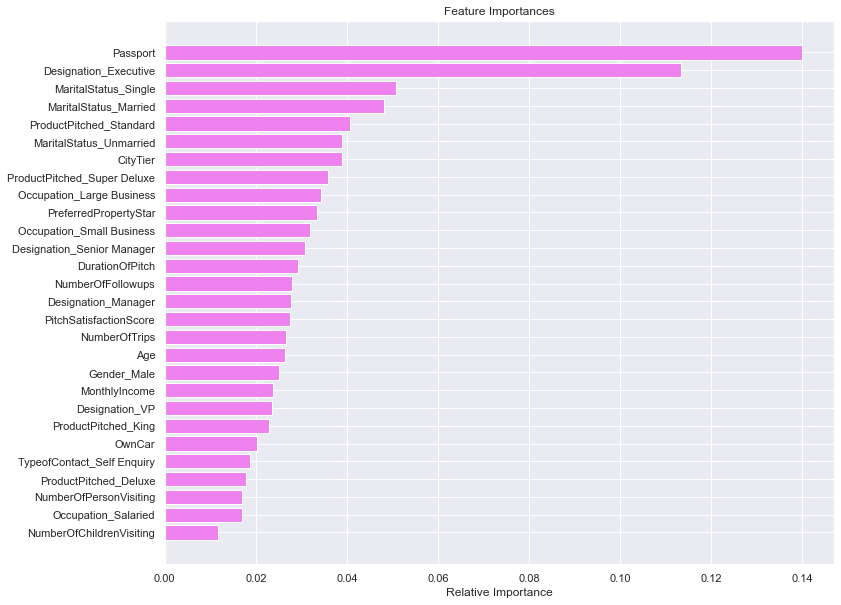

In [91]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Considering the tuned XGBoost, Passport is the most important feature followed by Designation_Executive and Maritalstatus_Single.

## Business Insights and Recommendations

* We have been able to build a model the company can deploy to target customers who are going to purchase the newly introduced package.
* Top 3 features that drive whether a customer will purchase the newly introduced travel package are Passport, Designation_Executive, and MaritalStatus_Single.
* Passport: Customers that have a passport are more likely to purchase the new travel package, because its the feature with the highest importance.
* Buying a travel package is highly dependent on whether the customer has a passport, the company can offer discount deals on passport application and renewals with an agency to customers.
* The company should include customer fitness in their future data collection, because it will be a very important variable in marketing the new wellness tourism package directly to customers who are working on attaining a healthy lifestyle.
* Package discount deals, flexible dates and purchase points should be put in place during the launch to attract customers who have a lower designation in their organization.